<a href="https://colab.research.google.com/github/sainiankur63/Master_Modular_project/blob/main/Second_Model_Accuracy_87_75_per.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Important Steps** <br>
**1) Removing Outliers**

1.   PRICE : In between ( 50 USD and 57364 USD )
2.   YEAR : taking year greater than 2000
3.   ODOMETER : In between ( 100 miles and 200000 miles)

**2) Drop Columns** <br> 
[ 'id' , 'url', 'region' , 'region_url ', 'VIN' , 'image_url' , 'description' , 'county' , 'state' , 'model' , 'lat' , 'long' ,  'posting_date' ]

**3) Null Values**


1. df['transmission'] = df['transmission'].fillna(df.transmission.mode()[0])
2. df['fuel'] = df['fuel'].fillna(df.fuel.mode()[0]) 
3. df['title_status'] = df['title_status'].fillna(df['title_status'].mode()[0])
4. df['manufacturer'] = df['manufacturer'].fillna(df['manufacturer'].mode()[0])
5. df['condition'] = df['condition'].fillna(df['condition'].mode()[0])
6. df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0])
7. df['drive'] = df['drive'].fillna(df['drive'].mode()[0])
8. df['type'] = df['type'].fillna(df['type'].mode()[0])
9. df['paint_color'] = df['paint_color'].fillna(df['paint_color'].mode()[0])

**4) Normalizaton**
1.   Standard Scalar
2.   Min Max Scalar

**5) Model Outcome**

1.   Random Forest :
                    n_estimators : 300
                    Model Score: 0.8779300961546638
                    Mean Absolute Error: 2074.39
                    Mean Squared Error: 19456572.94
                    Root Mean Squared Error: 4410.96
2.   Multi Linear Regression :
                    Model Score: 0.5382949343200012  
                    Mean Absolute Error: 6343.95
                    Mean Squared Error: 73591038.64
                    Root Mean Squared Error: 8578.52

In [1]:
!pip install pandas numpy pandas matplotlib seaborn opendatasets --quiet

In [2]:
!pip install imbalanced-learn

In [3]:
# To show all columns' names on a large pandas dataframe
import pandas as pd
pd.set_option('display.max_columns', None)

In [4]:
import pandas as pd
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,4)

In [5]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/austinreese/craigslist-carstrucks-data'


od.download(dataset_url)

data_dir = './craigslist-carstrucks-data'

Skipping, found downloaded files in "./craigslist-carstrucks-data" (use force=True to force download)


In [6]:
df = pd.read_csv(data_dir+"/vehicles.csv")

### **Checking outliers for each labels Outlier Detection**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

### **First Checking Outliers for Numeric data columns** <br>
Numeric columns : [ price ,year , odometer , lat , long ] <br>




In [8]:
df.describe().applymap(lambda x: f"{x:0.3f}")

,id,price,year,odometer,county,lat,long
count,426880.000,426880.000,425675.000,422480.000,0.000,420331.000,420331.000
mean,7311486634.224,75199.033,2011.235,98043.331,nan,38.494,-94.749
std,4473170.413,12182282.174,9.452,213881.501,nan,5.842,18.365
min,7207408119.000,0.000,1900.000,0.000,nan,-84.122,-159.828
25%,7308143339.250,5900.000,2008.000,37704.000,nan,34.602,-111.940
50%,7312620821.000,13950.000,2013.000,85548.000,nan,39.150,-88.433
75%,7315253543.500,26485.750,2017.000,133542.500,nan,42.399,-80.832
max,7317101084.000,3736928711.000,2022.000,10000000.000,nan,82.391,173.886


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


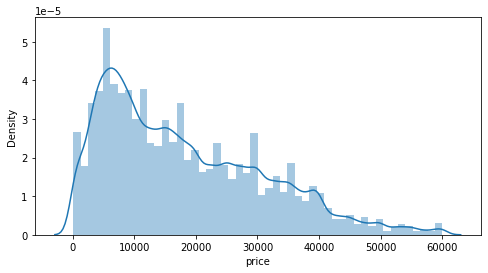

In [9]:
sns.distplot(df[(df.price >=  100) & (df.price <= 60000)].price)

In [10]:
df[(df.price >= 60000)].shape

(6320, 26)

In [11]:
# Outlier removal in price column

#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.price.quantile(0.75)-df.price.quantile(0.25)

#### Extreme outliers
lower_lim_price = df['price'].quantile(0.25)-(IQR*3)
upper_lim_price = df['price'].quantile(0.75)+(IQR*3)
print(lower_lim_price), print(upper_lim_price)

-55857.25
88243.0


(None, None)

In [12]:
lower_lim = df['price'].quantile(0.25)-(IQR*1.5)
upper_lim = df['price'].quantile(0.75)+(IQR*1.5)
print(lower_lim), print(upper_lim)

-24978.625
57364.375


(None, None)

In [13]:
# Taking 100 dollars as min and 60k dollars max value for price

df = df[(df.price >=  50) & (df.price <= 57364)]

In [14]:
df.shape

(383547, 26)

In [15]:
# Outlier removal in year column

df['year'].isnull().sum()

980

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


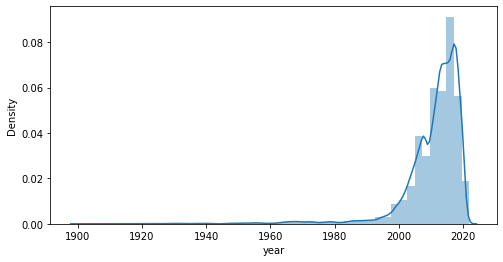

In [16]:
# checking the distribution of year column
import seaborn as sns

sns.distplot(df['year'].dropna())

**Observation:**
1. Data is left Skewed

In [17]:
#import seaborn as sns
#sns.boxplot(df['year'])

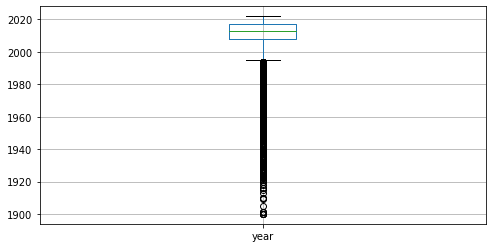

In [18]:
import seaborn as sns
figure=df.boxplot(column="year")

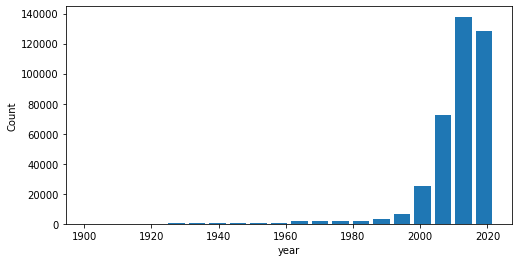

In [19]:
# Histogram for year column

plt.hist(df.year, bins=20, rwidth=0.8)
plt.xlabel('year')
plt.ylabel('Count')
plt.show()

In [20]:
df['year'].describe()

count    382567.000000
mean       2010.945921
std           9.487201
min        1900.000000
25%        2008.000000
50%        2013.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

As per the above graphs it is clearly shows that data of year is left skewed. 
For skewed Data , IQR techniqie is implement to remove outliers

In [21]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.year.quantile(0.75)-df.year.quantile(0.25)

In [22]:
lower_lim_year = df['year'].quantile(0.25)-(IQR*1.5)
upper_lim_year = df['year'].quantile(0.75)+(IQR*1.5)
print(lower_lim_year), print(upper_lim_year)

1994.5
2030.5


(None, None)

In [23]:
#### Extreme outliers
#lower_bridge=df['year'].quantile(0.25)-(IQR*3)
#upper_bridge=df['year'].quantile(0.75)+(IQR*3)
#print(lower_bridge), print(upper_bridge)

df.describe().applymap(lambda x: f"{x:0.3f}")

,id,price,year,odometer,county,lat,long
count,383547.000,383547.000,382567.000,381340.000,0.000,380088.000,380088.000
mean,7311481043.670,17840.768,2010.946,99597.898,nan,38.533,-94.265
std,4474298.939,12728.024,9.487,200218.953,nan,5.831,18.136
min,7207408119.000,50.000,1900.000,0.000,nan,-84.122,-159.828
25%,7308134318.500,7000.000,2008.000,39600.750,nan,34.747,-110.960
50%,7312621731.000,14995.000,2013.000,89000.000,nan,39.264,-87.960
75%,7315249677.500,26988.000,2017.000,136617.000,nan,42.370,-80.760
max,7317101084.000,57341.000,2022.000,10000000.000,nan,82.391,167.630


In [24]:
#Q1 = df.year.quantile(0.25)
#Q3 = df.year.quantile(0.75)
#Q1, Q3

In [25]:
#IQR = Q3 - Q1
#IQR

In [26]:
#lower_limit = Q1 - 1.5*IQR
#upper_limit = Q3 + 1.5*IQR
#lower_limit, upper_limit

In [27]:
df.shape

(383547, 26)

In [28]:
# Removing Outliers in year c

df = df[(df['year'] >= 2000)]

In [29]:
print("Shape of dataset after Outliers removal in YEAR column : ",len(df))

Shape of dataset after Outliers removal in YEAR column :  358554


**Outlier removal for odometer column**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


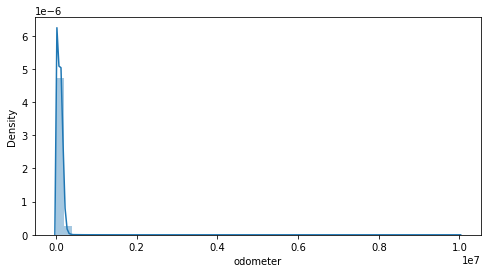

In [30]:
# checking the distribution of odometer column

import seaborn as sns

sns.distplot(df['odometer'].dropna())

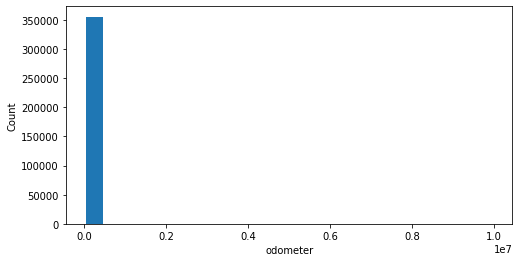

In [31]:
# creating boxplot for odometer column

plt.hist(df.odometer, bins=20, rwidth=0.8)      
plt.xlabel('odometer')
plt.ylabel('Count')
plt.show()

In [32]:
df.describe().applymap(lambda x: f"{x:0.3f}")

,id,price,year,odometer,county,lat,long
count,358554.000,358554.000,358554.000,356463.000,0.000,355225.000,355225.000
mean,7311453204.380,18266.231,2012.759,95547.162,nan,38.530,-94.081
std,4389684.142,12714.930,5.037,131596.202,nan,5.836,18.110
min,7301583321.000,50.000,2000.000,0.000,nan,-84.122,-159.828
25%,7308055583.250,7680.000,2009.000,39169.500,nan,34.749,-110.170
50%,7312518859.000,15750.000,2014.000,88000.000,nan,39.289,-87.821
75%,7315220989.750,26999.000,2017.000,135000.000,nan,42.393,-80.690
max,7317101084.000,57341.000,2022.000,10000000.000,nan,82.253,167.630


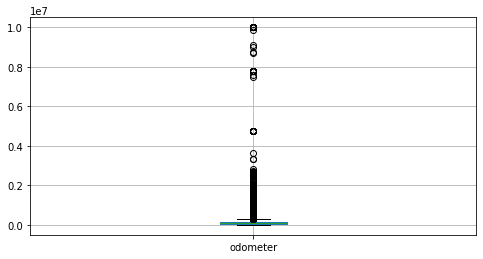

In [33]:
figure=df.boxplot(column="odometer")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


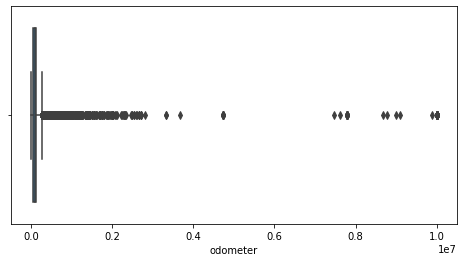

In [34]:
sns.boxplot(df['odometer'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


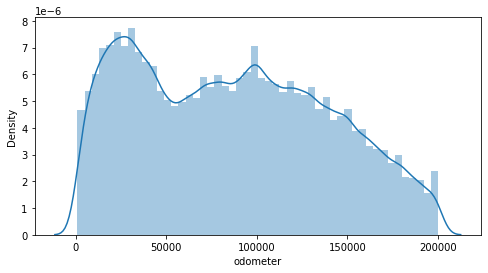

In [35]:
sns.distplot(df[(df.odometer >= 1000) & (df.odometer <= 200000)].odometer)

In [36]:
df[df.odometer >= 250000].shape

(5171, 26)

Odometer data is right skewed as per the above graphs. To tackle this data , IQR techinique is implemented

In [37]:
lower_lim_odometer = df['odometer'].quantile(0.25)-(IQR*1.5)
upper_lim_odometer = df['odometer'].quantile(0.75)+(IQR*1.5)
print(lower_lim_odometer), print(upper_lim_odometer)

39156.0
135013.5


(None, None)

In [38]:
lower_lim_odometer = df['odometer'].quantile(0.25)-(IQR*3)
upper_lim_odometer = df['odometer'].quantile(0.75)+(IQR*3)
print(lower_lim_odometer), print(upper_lim_odometer)

39142.5
135027.0


(None, None)

In [39]:
# Removing Outliers in odometer

df = df[(df.odometer >= 100) & (df.odometer <= 200000)]

In [40]:
df.shape

(334219, 26)

In [41]:
# Removing Outliers in year c

#df = df[(df['odometer'] >= lower_lim_odometer) & (df['odometer'] <= upper_lim_odometer)]

In [42]:
df.odometer.max()

200000.0

In [43]:
print("Shape of dataset after Outliers removal in odometer column : ",len(df))

Shape of dataset after Outliers removal in odometer column :  334219


In [44]:
df.describe().applymap(lambda x: f"{x:0.3f}")

,id,price,year,odometer,county,lat,long
count,334219.000,334219.000,334219.000,334219.000,0.000,331075.000,331075.000
mean,7311434557.519,18803.837,2013.072,85907.086,nan,38.541,-94.018
std,4392215.807,12665.831,4.856,53085.959,nan,5.850,18.175
min,7301583321.000,50.000,2000.000,100.000,nan,-81.838,-159.828
25%,7308035997.000,7999.000,2010.000,38177.000,nan,34.758,-108.652
50%,7312456222.000,16250.000,2014.000,83988.000,nan,39.300,-87.733
75%,7315204785.500,27990.000,2017.000,127635.000,nan,42.410,-80.607
max,7317101084.000,57341.000,2022.000,200000.000,nan,80.680,167.630


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334219 entries, 27 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            334219 non-null  int64  
 1   url           334219 non-null  object 
 2   region        334219 non-null  object 
 3   region_url    334219 non-null  object 
 4   price         334219 non-null  int64  
 5   year          334219 non-null  float64
 6   manufacturer  325093 non-null  object 
 7   model         331800 non-null  object 
 8   condition     205685 non-null  object 
 9   cylinders     195085 non-null  object 
 10  fuel          332271 non-null  object 
 11  odometer      334219 non-null  float64
 12  title_status  327933 non-null  object 
 13  transmission  332932 non-null  object 
 14  VIN           219373 non-null  object 
 15  drive         232675 non-null  object 
 16  size          89782 non-null   object 
 17  type          267963 non-null  object 
 18  pai

**Exploratory Data Analysis (EDA)**

In Data Analysis What All Things We Do
1. Missing Values
2. Explore About the Numerical Variables
3. Explore About categorical Variables
4. Finding Relationship between features

In [46]:
df.shape

(334219, 26)

In [47]:
# features with null values

[features for features in df.columns if df[features].isnull().sum()>0]

['manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'description',
 'county',
 'lat',
 'long']

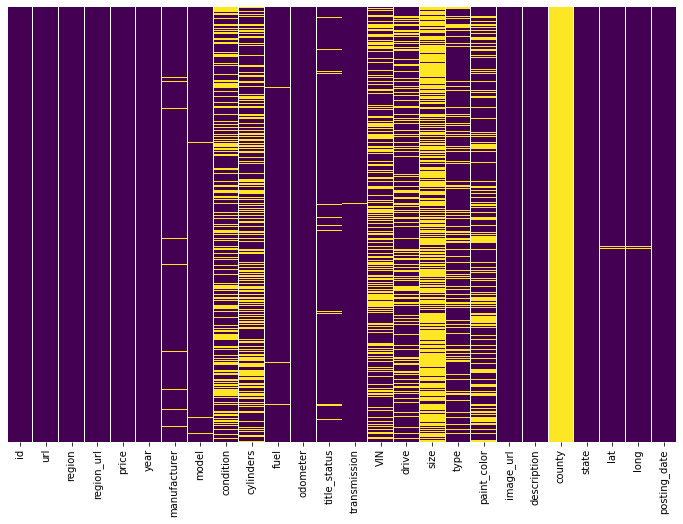

In [48]:
# creating a graph to check null values

plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Country column contains all null values , Drop the column



In [49]:
df['county'].isnull().sum()

334219

In [50]:
df.drop('county',axis =1 , inplace = True)

In [51]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 
missing_percentages[missing_percentages!=0]

size            0.731368
cylinders       0.416296
condition       0.384580
VIN             0.343625
drive           0.303825
paint_color     0.288033
type            0.198241
manufacturer    0.027305
title_status    0.018808
lat             0.009407
long            0.009407
model           0.007238
fuel            0.005829
transmission    0.003851
description     0.000006
dtype: float64

Text(0, 0.5, 'Features')

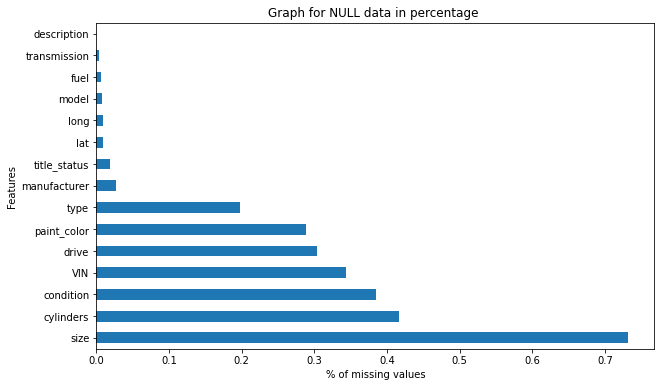

In [52]:
# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**TRANSMISSION**

In [53]:
# transmission column

df['transmission'].isnull().sum()

1287

In [54]:
df['transmission'].value_counts()

automatic    259139
other         59664
manual        14129
Name: transmission, dtype: int64

In [55]:
df_group_one = df[['transmission','fuel','price']]
df_group_one = df_group_one.groupby(['transmission','fuel'],as_index=False).mean()
df_group_one

,transmission,fuel,price
0,automatic,diesel,32229.860235
1,automatic,electric,20851.991254
2,automatic,gas,15657.208869
3,automatic,hybrid,14016.606173
4,automatic,other,22188.696793
5,manual,diesel,24657.192362
6,manual,electric,5256.800000
7,manual,gas,13621.866436
8,manual,hybrid,17402.909091
9,manual,other,26758.805310


In [56]:
# Replacing null values in transmission column

df['transmission'] = df['transmission'].fillna(df.transmission.mode()[0])

In [57]:
print("Number of null values :" ,df.transmission.isnull().sum())
print(df.transmission.value_counts())

Number of null values : 0
automatic    260426
other         59664
manual        14129
Name: transmission, dtype: int64


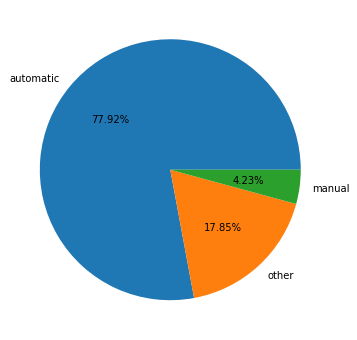

In [58]:
## Pie Chart for transmission column

plt.figure(figsize=(10,6))
plt.pie(df.transmission.value_counts().values,labels=df.transmission.value_counts().index,autopct='%1.2f%%')
plt.show()

In [59]:
# Transmission looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['transmission'] = LabelEncoding.fit_transform(df['transmission'])

In [60]:
df['transmission'].value_counts()

0    260426
2     59664
1     14129
Name: transmission, dtype: int64

Text(0, 0.5, 'Features')

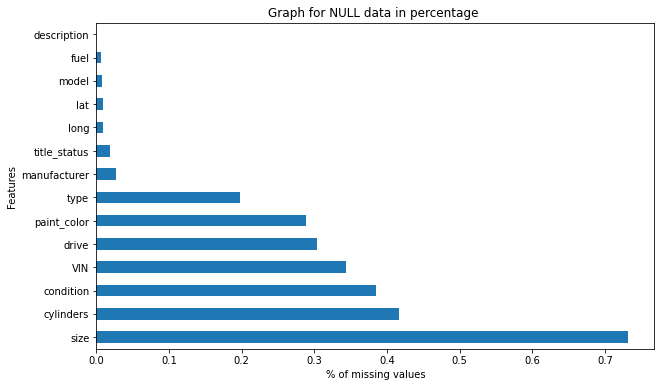

In [61]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 
missing_percentages[missing_percentages!=0]

# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**FUEL**

In [62]:
df['fuel'].isnull().sum()

1948

In [63]:
df['fuel'].value_counts()

gas         283479
other        26282
diesel       16454
hybrid        4564
electric      1492
Name: fuel, dtype: int64

In [64]:
len (df[~ ((df['fuel'] == 'other') | (df['fuel'] == 'gas') | (df['fuel'] == 'diesel') | (df['fuel'] == 'hybrid') | (df['fuel'] == 'electric')) ])

1948

In [65]:
# Replacing null values in fuel column

df['fuel'] = df['fuel'].fillna(df.fuel.mode()[0])

In [66]:
print("Number of null values :" ,df.fuel.isnull().sum())
print(df.fuel.value_counts())

Number of null values : 0
gas         285427
other        26282
diesel       16454
hybrid        4564
electric      1492
Name: fuel, dtype: int64


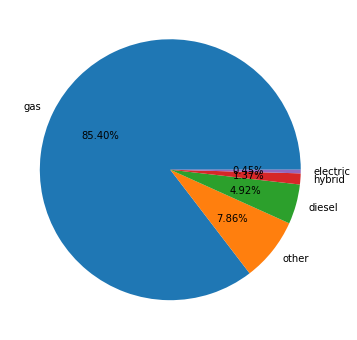

In [67]:
## Pie Chart for fuel column

plt.figure(figsize=(10,6))
plt.pie(df.fuel.value_counts().values,labels=df.fuel.value_counts().index,autopct='%1.2f%%')
plt.show()

In [68]:
# fuel looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['fuel'] = LabelEncoding.fit_transform(df['fuel'])

In [69]:
df['fuel'].value_counts()

2    285427
4     26282
0     16454
3      4564
1      1492
Name: fuel, dtype: int64

Text(0, 0.5, 'Features')

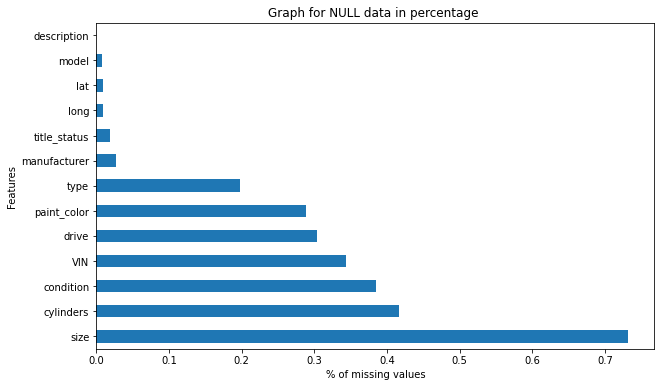

In [70]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 


# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

MODEL

In [71]:
df['model'].isnull().sum()

2419

In [72]:
len(df['model'].unique())

21242

Model column contains 15663 unique values , will drop this column for now

In [73]:
df.drop('model', axis=1 , inplace=True)

Text(0, 0.5, 'Features')

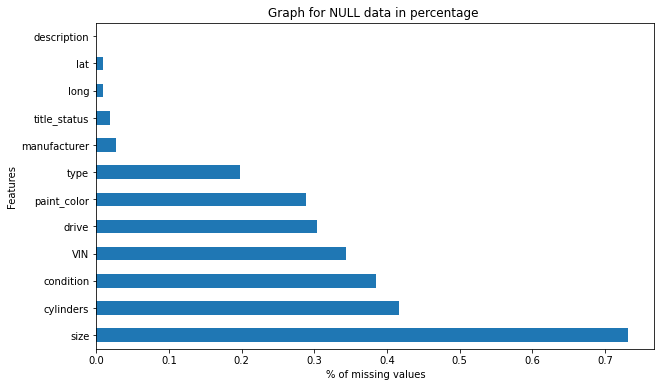

In [74]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 


# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**Drop Unnecessary columns for now**
1. id
2. url
3. region
4. region_url
5. VIN
6. image_url
7. description
8. state
9. lat
10. long
11. posting_date


In [75]:
df.drop(['id','url','region','region_url','VIN','image_url','description','state','lat','long','posting_date'], axis =1 , inplace = True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334219 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         334219 non-null  int64  
 1   year          334219 non-null  float64
 2   manufacturer  325093 non-null  object 
 3   condition     205685 non-null  object 
 4   cylinders     195085 non-null  object 
 5   fuel          334219 non-null  int64  
 6   odometer      334219 non-null  float64
 7   title_status  327933 non-null  object 
 8   transmission  334219 non-null  int64  
 9   drive         232675 non-null  object 
 10  size          89782 non-null   object 
 11  type          267963 non-null  object 
 12  paint_color   237953 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 35.7+ MB


Text(0, 0.5, 'Features')

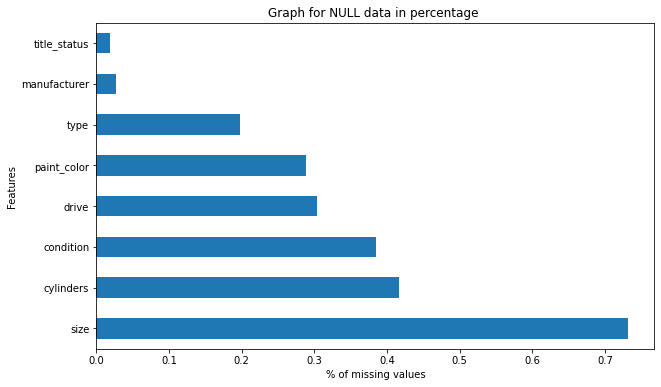

In [77]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 


# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**title_status**

In [78]:
df['title_status'].isnull().sum()

6286

In [79]:
df['title_status'].value_counts()

clean         316733
rebuilt         6532
salvage         3218
lien            1225
missing          158
parts only        67
Name: title_status, dtype: int64

In [80]:
df['title_status'] = df['title_status'].fillna(df['title_status'].mode()[0])

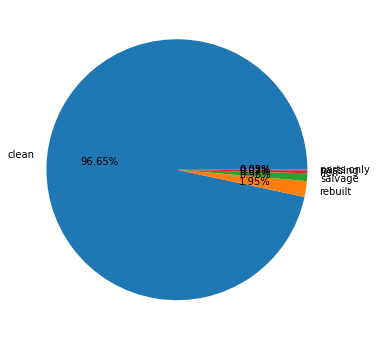

In [81]:
## Pie Chart for title_status column

plt.figure(figsize=(10,6))
plt.pie(df.title_status.value_counts().values,labels=df.title_status.value_counts().index,autopct='%1.2f%%')
plt.show()

In [82]:
# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['title_status'] = LabelEncoding.fit_transform(df['title_status'])

In [83]:
df['title_status'].value_counts()

0    323019
4      6532
5      3218
1      1225
2       158
3        67
Name: title_status, dtype: int64

Text(0, 0.5, 'Features')

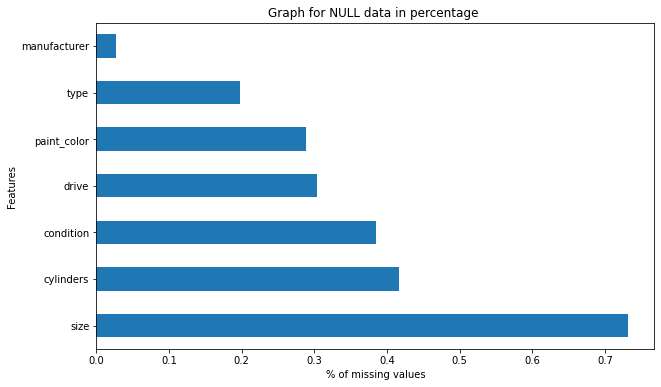

In [84]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 


# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**manufacturer**

In [85]:
df['manufacturer'].isnull().sum()

9126

In [86]:
df['manufacturer'].value_counts()

ford               52655
chevrolet          40252
toyota             27001
honda              17430
nissan             16211
jeep               15322
ram                13625
bmw                12937
gmc                12437
dodge              10783
hyundai             9047
mercedes-benz       8952
subaru              8337
volkswagen          7921
kia                 7343
lexus               7086
audi                6813
cadillac            5656
acura               5347
chrysler            5163
mazda               4638
buick               4534
infiniti            4270
lincoln             3581
volvo               2795
mitsubishi          2718
mini                2204
rover               1736
jaguar              1626
pontiac             1510
porsche             1000
saturn               953
alfa-romeo           814
mercury              782
tesla                748
fiat                 731
harley-davidson      112
aston-martin          10
land rover             9
ferrari                3


In [87]:
df['manufacturer'] = df['manufacturer'].fillna(df['manufacturer'].mode()[0])

In [88]:
df['manufacturer'].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'buick', 'mercedes-benz', 'bmw',
       'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'aston-martin', 'land rover', 'morgan', 'ferrari'], dtype=object)

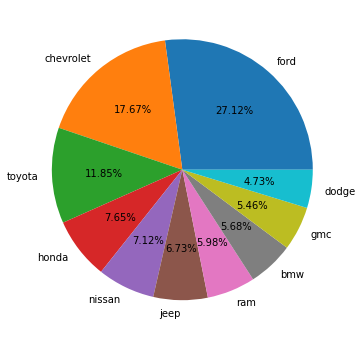

In [89]:
## Pie Chart for TOP 10 manufacturer column

plt.figure(figsize=(10,6))
plt.pie(df.manufacturer.value_counts()[:10].values,labels=df.manufacturer.value_counts()[:10].index,autopct='%1.2f%%')
plt.show()

### " **manufacturer** " is a **Nominal data**, 3 techniques to solve this:
1. ONE HOT ENCODING
2. ONE HOT ENCODING WITH MULTIPLE CATEGORIES
3. MEAN ENCODING

In [90]:
!pip install category_encoders --quiet

     |████████████████████████████████| 86 kB 2.5 MB/s 


In [91]:
# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['manufacturer'] = LabelEncoding.fit_transform(df['manufacturer'])


In [92]:
df

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
27,33590,2014.0,13,good,8 cylinders,2,57923.0,0,2,NaN,NaN,pickup,white
28,22590,2010.0,7,good,8 cylinders,2,71229.0,0,2,NaN,NaN,pickup,blue
29,39590,2020.0,7,good,8 cylinders,2,19160.0,0,2,NaN,NaN,pickup,red
30,30990,2017.0,38,good,8 cylinders,2,41124.0,0,2,NaN,NaN,pickup,red
31,15000,2013.0,12,excellent,6 cylinders,2,128000.0,0,0,rwd,full-size,truck,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,30,good,6 cylinders,2,32226.0,0,2,fwd,NaN,sedan,NaN
426876,30590,2020.0,40,good,NaN,2,12029.0,0,2,fwd,NaN,sedan,red
426877,34990,2020.0,6,good,NaN,0,4174.0,0,2,NaN,NaN,hatchback,white
426878,28990,2018.0,22,good,6 cylinders,2,30112.0,0,2,fwd,NaN,sedan,silver


In [93]:
df.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color'],
      dtype='object')

In [94]:
# Reset Index

df.reset_index(inplace = True)
df.drop('index',axis =1, inplace= True)

In [95]:
df

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,33590,2014.0,13,good,8 cylinders,2,57923.0,0,2,NaN,NaN,pickup,white
1,22590,2010.0,7,good,8 cylinders,2,71229.0,0,2,NaN,NaN,pickup,blue
2,39590,2020.0,7,good,8 cylinders,2,19160.0,0,2,NaN,NaN,pickup,red
3,30990,2017.0,38,good,8 cylinders,2,41124.0,0,2,NaN,NaN,pickup,red
4,15000,2013.0,12,excellent,6 cylinders,2,128000.0,0,0,rwd,full-size,truck,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334214,23590,2019.0,30,good,6 cylinders,2,32226.0,0,2,fwd,NaN,sedan,NaN
334215,30590,2020.0,40,good,NaN,2,12029.0,0,2,fwd,NaN,sedan,red
334216,34990,2020.0,6,good,NaN,0,4174.0,0,2,NaN,NaN,hatchback,white
334217,28990,2018.0,22,good,6 cylinders,2,30112.0,0,2,fwd,NaN,sedan,silver


**condition**



In [96]:
df['condition'].isnull().sum()

128534

In [97]:
df['condition'].value_counts()

good         104043
excellent     80178
like new      17698
fair           2807
new             632
salvage         327
Name: condition, dtype: int64

In [98]:
df_group_one = df[['condition','year']]
df_group_one = df_group_one.groupby(['condition','year'],as_index=False).count()
df_group_one

,condition,year
0,excellent,2000.0
1,excellent,2001.0
2,excellent,2002.0
3,excellent,2003.0
4,excellent,2004.0
...,...,...
132,salvage,2017.0
133,salvage,2018.0
134,salvage,2019.0
135,salvage,2020.0


In [99]:
df[df.condition == 'good'].year.value_counts()

2018.0    13959
2017.0    11263
2019.0    10063
2020.0     9703
2016.0     7848
2013.0     7109
2014.0     6370
2015.0     6266
2012.0     4910
2011.0     3930
2008.0     3216
2010.0     3109
2007.0     2748
2006.0     2593
2009.0     2489
2005.0     2072
2004.0     1846
2003.0     1494
2002.0     1204
2001.0      961
2000.0      752
2021.0      136
2022.0        2
Name: year, dtype: int64

In [100]:
df['condition'] = df['condition'].fillna(df['condition'].mode()[0])

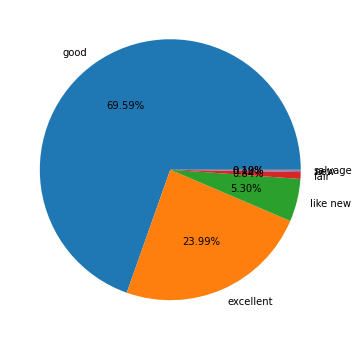

In [101]:
## Pie Chart for condition column

plt.figure(figsize=(10,6))
plt.pie(df.condition.value_counts().values,labels=df.condition.value_counts().index,autopct='%1.2f%%')
plt.show()

In [102]:
# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['condition'] = LabelEncoding.fit_transform(df['condition'])

**cylinder**

In [103]:
df['cylinders'].isnull().sum()

139134

In [104]:
df['cylinders'].value_counts()

6 cylinders     77034
4 cylinders     65549
8 cylinders     48933
5 cylinders      1407
10 cylinders      903
other             719
3 cylinders       448
12 cylinders       92
Name: cylinders, dtype: int64

In [105]:
# splitting the cylinder column

df['cylinders'] = df['cylinders'].str.split(' ').str[0]

In [106]:
# filling null values

df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0])

In [107]:
# replacing others value in cylinder column with 0
df['cylinders'] = df['cylinders'].replace(['other'],'0')


In [108]:
# changing into integer column

df['cylinders'] = df['cylinders'].astype('int')

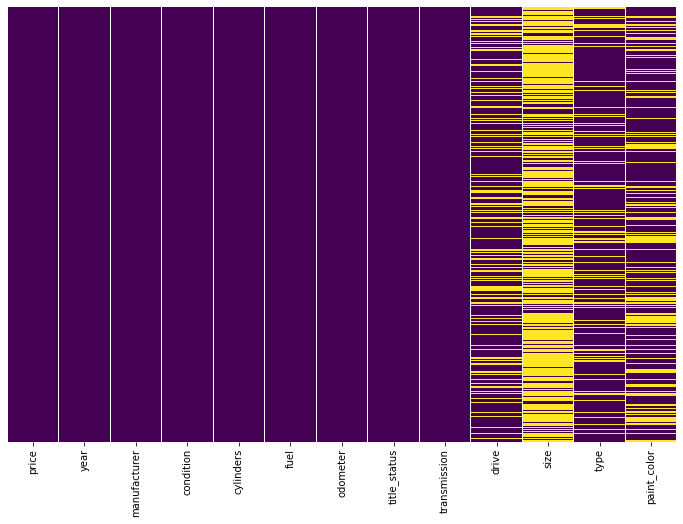

In [109]:
# creating a graph to check null values

plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0, 0.5, 'Features')

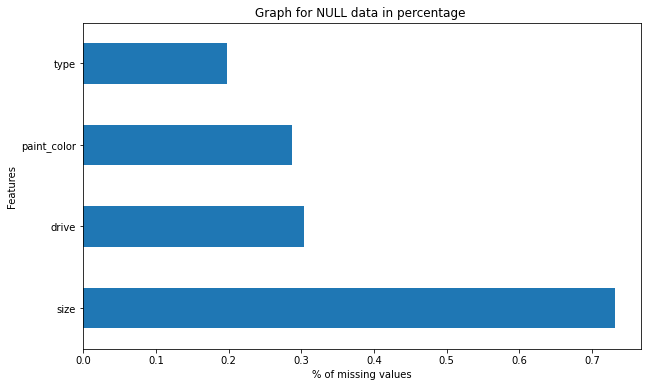

In [110]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 

# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**drive** 

In [111]:
df['drive'].isnull().sum()

101544

In [112]:
df['drive'].value_counts()

4wd    101452
fwd     89682
rwd     41541
Name: drive, dtype: int64

In [113]:
df['drive'] = df['drive'].fillna(df['drive'].mode()[0])

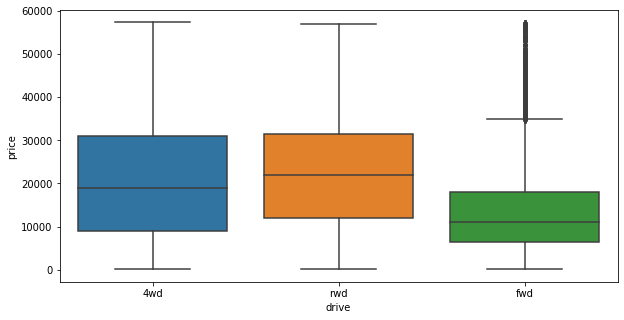

In [114]:
plt.figure(figsize=(10,5))
sns.boxplot(x="drive", y="price", data=df)

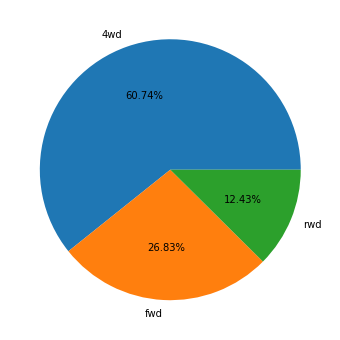

In [115]:
## Pie Chart for drive column

plt.figure(figsize=(10,6))
plt.pie(df.drive.value_counts().values,labels=df.drive.value_counts().index,autopct='%1.2f%%')
plt.show()

In [116]:
# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['drive'] = LabelEncoding.fit_transform(df['drive'])

**type**

In [117]:
df['type'].isnull().sum()

66256

In [118]:
df['type'].value_counts()

sedan          73966
SUV            63068
pickup         34658
truck          23123
other          17977
hatchback      15127
coupe          14462
wagon           9144
van             6665
convertible     5218
mini-van        3916
bus              343
offroad          296
Name: type, dtype: int64

In [119]:
df['type'] = df['type'].fillna(df['type'].mode()[0])

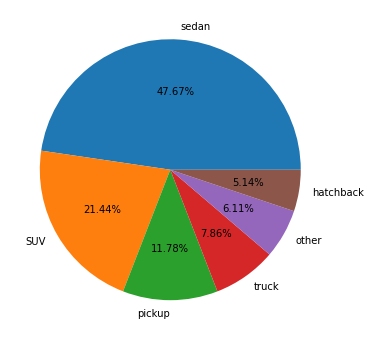

In [120]:
## Pie Chart for top 6 type column

plt.figure(figsize=(10,6))
plt.pie(df['type'].value_counts().values[:6],labels=df['type'].value_counts().index[:6],autopct='%1.2f%%')
plt.show()

In [121]:

# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['type'] = LabelEncoding.fit_transform(df['type'])

Text(0, 0.5, 'Features')

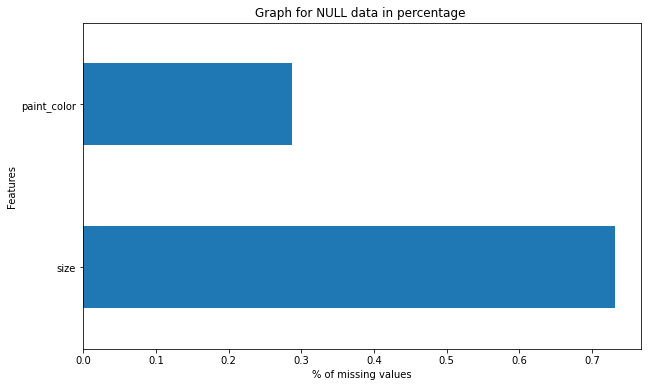

In [122]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 

# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

Size column contains about 70 percent of the Null values, dropping this column for now

In [123]:
# size column drop

df.drop('size' , axis =1 , inplace = True)

**paint_color**         

In [124]:
df['paint_color'].isnull().sum()

96266

In [125]:
df['paint_color'].value_counts()

white     61942
black     52131
silver    36230
blue      25160
red       23903
grey      20200
custom     5241
brown      5094
green      4740
orange     1483
yellow     1378
purple      451
Name: paint_color, dtype: int64

In [126]:
df['paint_color'] = df['paint_color'].fillna(df['paint_color'].mode()[0])

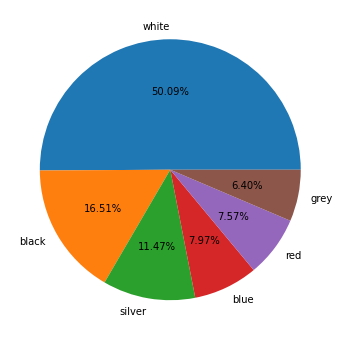

In [127]:
## Pie Chart for top 6 paint_color column

plt.figure(figsize=(10,6))
plt.pie(df['paint_color'].value_counts().values[:6],labels=df['paint_color'].value_counts().index[:6],autopct='%1.2f%%')
plt.show()

In [128]:
# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['paint_color'] = LabelEncoding.fit_transform(df['paint_color'])

In [129]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentages

price           0.0
year            0.0
manufacturer    0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
dtype: float64

In [130]:
X_data = df.drop('price',axis =1 )
y_data = df['price']

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [132]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(267375, 11) (267375,)
(66844, 11) (66844,)


In [133]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [134]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [135]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
import numpy as np

n_est = [10,20,30,40,50,60,70,80,90,100]
for i in n_est:
  regressor = RandomForestRegressor(n_estimators=i, random_state=42)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print('n_estimators:',i)
  print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
  print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
  print('Root Mean Squared Error:' , round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

n_estimators: 10
Mean Absolute Error: 2198.1
Mean Squared Error: 21443107.59
Root Mean Squared Error: 4630.67
n_estimators: 20
Mean Absolute Error: 2136.04
Mean Squared Error: 20389992.6
Root Mean Squared Error: 4515.53
n_estimators: 30
Mean Absolute Error: 2111.14
Mean Squared Error: 19970005.13
Root Mean Squared Error: 4468.78
n_estimators: 40
Mean Absolute Error: 2101.64
Mean Squared Error: 19845242.0
Root Mean Squared Error: 4454.8
n_estimators: 50
Mean Absolute Error: 2093.43
Mean Squared Error: 19715631.06
Root Mean Squared Error: 4440.23
n_estimators: 60
Mean Absolute Error: 2090.17
Mean Squared Error: 19667192.19
Root Mean Squared Error: 4434.77
n_estimators: 70
Mean Absolute Error: 2086.64
Mean Squared Error: 19648150.18
Root Mean Squared Error: 4432.62
n_estimators: 80
Mean Absolute Error: 2084.42
Mean Squared Error: 19628815.4
Root Mean Squared Error: 4430.44
n_estimators: 90
Mean Absolute Error: 2083.23
Mean Squared Error: 19604210.6
Root Mean Squared Error: 4427.66
n_estim

In [136]:
regressor.score(X_test,y_test)

0.8770494717736207

In [137]:
# Multiple Linear Regression

from sklearn.linear_model import LinearRegression

Multi_Linear_model = LinearRegression()
Multi_Linear_model.fit(X_train, y_train)
y_pred = Multi_Linear_model.predict(X_test)


In [138]:
from sklearn.metrics import accuracy_score
#accuracy_score(y_test,y_pred)
Multi_Linear_model.score(X_test,y_test)

0.5382922245362045

In [139]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 6343.95
Mean Squared Error: 73591038.64
Root Mean Squared Error: 8578.52


In [140]:
  regressor = RandomForestRegressor(n_estimators=200, random_state=42)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print('n_estimators:',i)
  print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
  print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
  print('Root Mean Squared Error:' , round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

n_estimators: 100
Mean Absolute Error: 2074.39
Mean Squared Error: 19456572.94
Root Mean Squared Error: 4410.96


In [141]:
regressor.score(X_test,y_test)

0.8779300961546638